<h1 style="color:#00CED1; font-weight:bold; font-size:60px;">Turby Cargado</h1>
<h2>Análisis de Series de Tiempo</h2>
<p><strong>Autor:</strong> Ruben Durango</p>
<p><strong>Fecha:</strong> 08 de Agosto de 2024</p>
<p><strong>Descripción:</strong> Este notebook analiza los tiempos de carga del auto Changan Lumin (Turby) para validar el mejor modelo de predicción de carga.</p>

---

El objetivo de este notebook es entender cómo se comportan los ciclos de carga del auto Changan Lumin, (**Turby**). A través de un análisis detallado de las series de tiempo de los datos de carga, buscamos identificar patrones y tendencias que nos permitan *construir un modelo predictivo preciso*. Este modelo nos ayudará a estimar con mayor exactitud el tiempo de carga del vehículo


## Tabla de Contenido

1. [Importación de Librerías](#importacion-de-librerias)
2. [Carga y Exploración de Datos](#carga-y-exploracion-de-datos)
3. [Análisis Exploratorio de Datos](#analisis-exploratorio-de-datos)
4. [Modelado y Validación](#modelado-y-validacion)
5. [Conclusiones](#conclusiones)

### 1. Importación de Librerías
<a id="importacion-de-librerias"></a>
En esta sección, importamos las librerías necesarias para el **análisis de datos**, la **visualización** y la **construcción del modelo predictivo**. 

>Utilizaremos pandas para la manipulación de datos, numpy para operaciones numéricas, matplotlib y seaborn para la visualización, y scikit-learn para el modelado.

In [3]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Configuración de estilos para los gráficos
plt.style.use('fivethirtyeight') 

# Configuración adicional para matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20

### 2. Carga y Exploración de Datos
<a id="carga-y-exploracion-de-datos"></a>

En esta sección, cargaremos los datos de carga de Turby y realizaremos una exploración inicial para comprender su estructura y características principales. Además, limpiaremos los datos y los prepararemos para el análisis posterior.

In [10]:
# Carga del dataset
df_raw = pd.read_csv('../data/cargas.csv', sep=';')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   23 non-null     int64 
 1   Hora    23 non-null     object
 2   Tiempo  23 non-null     int64 
 3   Carga   23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


> **Nota**: La columna `Hora` no es tan necesaria, pues ya tenemos la columna `Tiempo` que representa los minutos desde el inicio de la carga, *que es realmente lo que necesito*

In [24]:
# Corrigiendo el tipo de datos
df = df_raw.copy()

## Columnas "Carga"
df['Carga'] = df['Carga'].str.replace(',', '.').astype(float)

# Eliminando columnas innecesarias
df = df.drop(columns=['Hora'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   23 non-null     int64  
 1   Tiempo  23 non-null     int64  
 2   Carga   23 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 680.0 bytes


In [27]:
df.head()

,Index,Tiempo,Carga
0,1,0,0.25
1,1,190,0.72
2,1,235,0.81
3,2,0,0.47
4,2,12,0.50


### 3. Análisis Exploratorio de Datos
<a id="analisis-exploratorio-de-datos"></a>

En esta sección, realizaremos un análisis exploratorio de los datos para identificar patrones, tendencias y relaciones importantes. Este análisis nos ayudará a comprender mejor los datos y a preparar el terreno para la construcción del modelo predictivo.

In [29]:
print("Resumen estadístico básico:")
df.describe()

Resumen estadístico básico:


,Index,Tiempo,Carga
count,23.000000,23.000000,23.000000
mean,2.913043,71.391304,0.546087
std,1.239980,76.097270,0.177219
min,1.000000,0.000000,0.250000
25%,2.000000,12.000000,0.425000
50%,3.000000,36.000000,0.500000
75%,4.000000,134.500000,0.695000
max,5.000000,235.000000,0.830000


In [63]:
print("Resumen estadístico agrupado por ciclo de carga:")
df.groupby('Index').describe()

Resumen estadístico agrupado por ciclo de carga:


Tiempo                                                           Carga  \
       count        mean         std  min    25%    50%     75%    max count   
Index                                                                          
1        3.0  141.666667  124.733048  0.0  95.00  190.0  212.50  235.0   3.0   
2        6.0   52.333333   48.508419  0.0  17.75   43.5   76.75  130.0   6.0   
3        7.0   68.000000   73.857972  0.0  17.00   34.0  105.50  197.0   7.0   
4        4.0   58.250000   81.993394  0.0  12.00   27.0   73.25  179.0   4.0   
5        3.0   64.666667   82.809017  0.0  18.00   36.0   97.00  158.0   3.0   

                                                              
           mean       std   min     25%    50%     75%   max  
Index                                                         
1      0.593333  0.300721  0.25  0.4850  0.720  0.7650  0.81  
2      0.591667  0.112146  0.47  0.5125  0.570  0.6500  0.77  
3      0.464286  0.175201  0.30  0.3450  0.380  0.5550  0.77  
4      0.547500  0.191898  0.41  0.4400  0.475  0.5825  0.83  
5      0.596667  0.198578  0.44  0.4850  0.530  0.6750  0.82

> **Nota**: Para este caso, no voy a construir tantos gráficos exploratorios porque sé exactamente lo que quiero ver: "El comportamiento de cada ciclo de carga", es decir, la relación entre la carga y el tiempo para cada ciclo.

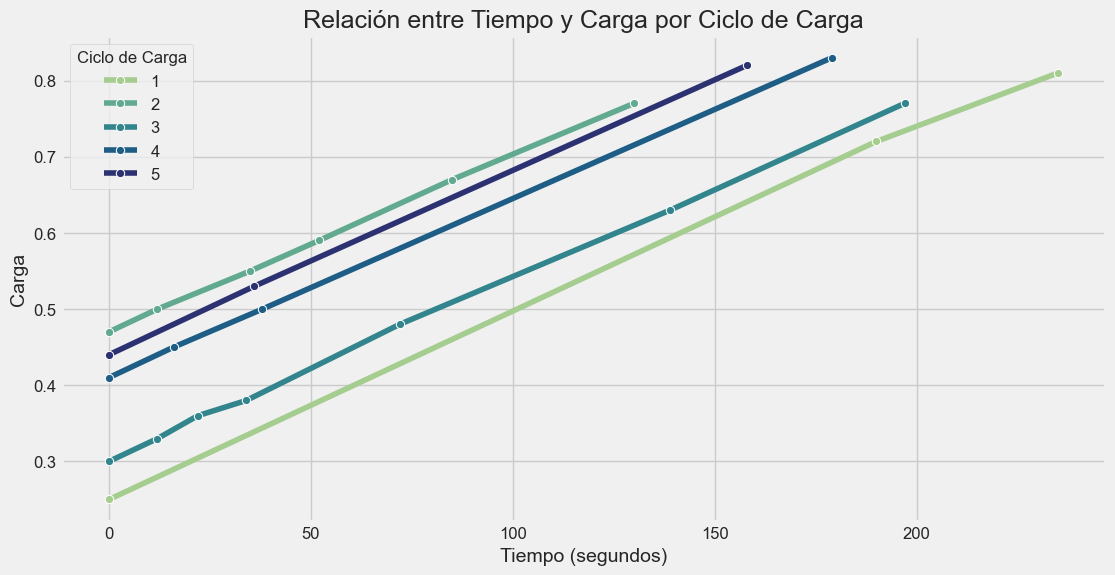

In [58]:
sns.lineplot(data=df, x='Tiempo', y='Carga', hue='Index', marker='o',palette=sns.color_palette('crest', as_cmap=True))
plt.title('Relación entre Tiempo y Carga por Ciclo de Carga')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Carga')
plt.legend(title='Ciclo de Carga')
plt.show()

> **Nota**: Parece que el **comportamiento es lineal** (más simple de lo esperado), y que la carga depende de la *carga inicial* y de la *pendiente* de estas líneas (que parece ser la misma).


### 4. Modelado y Validación
<a id="modelado-y-validacion"></a>

En esta sección, nos decantaremos por una regresión lineal para modelar la relación entre el tiempo y la carga de la batería. Este modelo nos permitirá predecir el tiempo necesario para alcanzar un porcentaje de carga deseado, dado un nivel de carga inicial.

Ahora entrenamos un modelo de *regresión lineal para cada ciclo de carga* y calculamos la **pendiente**, el **intercepto** y el **coeficiente de determinación** (R²).

In [66]:
# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre cada ciclo de carga
for ciclo in df['Index'].unique():
    # Filtrar los datos para el ciclo actual
    subset = df[df['Index'] == ciclo]
    
    # Definir las características (X) y el objetivo (y)
    X = subset['Tiempo'].values.reshape(-1, 1)  # Reshape para que tenga la forma correcta
    y = subset['Carga'].values
    
    # Crear y entrenar el modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    # Predecir usando el modelo entrenado
    y_pred = modelo.predict(X)
    
    # Calcular la pendiente, el intercepto y el R2
    pendiente = modelo.coef_[0]
    intercepto = modelo.intercept_
    r2 = r2_score(y, y_pred)
    
    # Almacenar los resultados en una lista
    resultados.append({'Ciclo': ciclo, 'Pendiente': pendiente, 'Intercepto': intercepto, 'R2': r2})

# Convertir la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar los resultados
resultados_df


,Ciclo,Pendiente,Intercepto,R2
0,1,0.002410,0.251952,0.999029
1,2,0.002312,0.470693,0.999750
2,3,0.002372,0.303022,0.999491
3,4,0.002340,0.411173,0.999970
4,5,0.002398,0.441601,0.999910


> **Nota**: Como se observó en la gráfica, el intercepto siempre corresponde a la carga inicial y la pendiente es prácticamente la misma en todos los ciclos (tomaré el valor promedio). El coeficiente de determinación (R²) confirma que el ciclo de carga de mi auto es completamente lineal.

In [69]:
# Calculando la pendiente promedio
pendiente_promedio = resultados_df['Pendiente'].mean()
print(pendiente_promedio)

0.0023662327596904323


Entonces, tomando la ecuación de la regresión lineal, esta puede ser expresada en este caso así:

$$
\text{y (Carga\_Final)} = \text{Pendiente} \times \text{X (Tiempo\_Minutos)} + \text{Intercepto (Carga\_Inicial)}
$$

Lo que quiero calcular es realmente el *tiempo en minutos que tardará mi auto en cargar*. Por lo tanto, necesito despejar este tiempo y expresar la ecuación en términos de lo que conozco, que son la *carga inicial* y la *carga deseada*.

$$
\text{X (Tiempo\_Minutos)} = \frac{\text{y (Carga\_Final)} - \text{Intercepto (Carga\_Inicial)}}{\text{Pendiente}}
$$

### 5. Conclusiones
<a id="conclusiones"></a>

Finalmente, de este análisis pude derivar una función sencilla para calcular los minutos necesarios para cargar mi auto:

In [70]:
def calcular_tiempo_carga(carga_inicial, carga_final, pendiente):
    """
    Calcula el tiempo en minutos necesario para cargar la batería desde una carga inicial hasta una carga final.

    Parámetros:
    carga_inicial (float): La carga inicial de la batería (entre 0 y 1).
    carga_final (float): La carga deseada de la batería (entre 0 y 1).
    pendiente (float): La pendiente de la regresión lineal.

    Retorna:
    float: El tiempo en minutos necesario para alcanzar la carga final desde la carga inicial.
    """
    # Despejar el tiempo en minutos usando la fórmula de la regresión lineal
    tiempo_minutos = (carga_final - carga_inicial) / pendiente
    return tiempo_minutos

Además, he calculado la pendiente del comportamiento de carga. Es un poco sorprendente lo simple que resultó ser, ya que la carga sigue un comportamiento lineal predecible. Esto me alegra porque es fácil de modelar, pero también me entristece porque esperaba algo más complejo.

Es importante mencionar que este análisis depende de varios factores que he asumido constantes:

- **Temperatura**: La eficiencia de la carga de la batería puede variar significativamente con la temperatura ambiental.
- **Voltaje**: Supuse que el voltaje de carga es constante, aunque en la realidad puede fluctuar.
- **Estado de la Batería**: La capacidad y eficiencia de la batería pueden cambiar con el tiempo y el uso, lo que no se ha considerado en este análisis.
- **Condiciones de Carga**: Factores como la calidad del cargador y las condiciones de conexión también pueden influir.

A futuro, será interesante seguir monitoreando la pendiente de la carga, ya que su cambio podría indicar cómo la vida útil de la batería se va reduciendo y aumentando los tiempos de carga. Esto me permitirá tomar decisiones informadas sobre el mantenimiento o la sustitución de la batería para asegurar que siga funcionando de manera óptima.